# <img style='float: left' src="http://lightning-viz.github.io/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Line plots in <a href='http://lightning-viz.github.io/'><font color='#9175f0'>Lightning</font></a>

## <hr> Configurar

In [1]:
from lightning import Lightning

from numpy import random, asarray, arange

from scipy.ndimage.filters import gaussian_filter
from seaborn import color_palette

## Conexion al Servidor


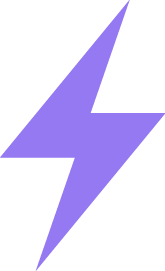

Connected to server at http://localhost:3000


<IPython.core.display.Javascript object>

In [2]:
lgn = Lightning(ipython=True)

## <hr> Una de las líneas al azar con estilos predeterminados

Comportamientos de zoom personalizados


In [3]:
y = gaussian_filter(random.rand(100), 3)
lgn.line(y)

## <hr>Establecimiento del ancho de línea y el color

Por una linea puedes poner tamaño y color

In [4]:
y = gaussian_filter(random.rand(100), 3)
lgn.line(y, thickness=10, color=[255,100,100])

## <hr> Multiples lineas


Se asignará automáticamente a los colores de múltiples líneas .

In [5]:
y = gaussian_filter(random.rand(5,100), [0, 3])
y = (y.T + arange(0,5)*0.2).T
lgn.line(y, thickness=6)

También puede ajustar los colores y grosores, por cada linea . Aquí hacemos el uso de una paleta de ` seaborn`

In [6]:
y = gaussian_filter(random.rand(5,100), [0, 3])
y = (y.T + arange(0,5)*0.2).T
c = map(lambda x: list(asarray(x)*255), color_palette('Blues', 5))
s = [8, 10, 12, 14, 16]
lgn.line(y, thickness=s, color=c)

## <hr> Líneas escalonadas e índices

Es posible mostrar varias líneas de longitud desigual.
<br>
Se establece un ` index` para establecer las eje x (suponemos que el` index` corresponde a la linea mas larga).

In [7]:
y1 = gaussian_filter(random.rand(50), 5).tolist()
y2 = gaussian_filter(random.rand(75), 5).tolist()
y3 = gaussian_filter(random.rand(100), 5).tolist()
x = range(50,150)
lgn.line([y1,y2,y3], thickness=6, index=x)

## <hr> Series Agrupadas con etiquetas

En lugar de especificar directamente los colores como RGB , puede especificar las asignaciones de grupo .
<br>
Aquí usamos ` scikitlearn` para generar clusters y luego de color acuerdo con la etiqueta clúster

In [8]:
d, g = datasets.make_blobs(n_features=5, n_samples=20, centers=5, cluster_std=1.0, random_state=100)
lgn.line(d, group=g)

NameError: name 'datasets' is not defined

## <hr> Etiquetas Axis

También puede etiquetar los ejes .

In [9]:
y = gaussian_filter(random.rand(100), 3)
lgn.line(y, thickness=10, xaxis='variable #1', yaxis='variable #2')

## Ejemplo Line con datos extraidos de una base de datos

In [10]:
import psycopg2, psycopg2.extras
try:
    conn = psycopg2.connect("dbname='gp' user='roma' host='localhost' password='roma'")
except:
    print "I am unable to connect to the database"
cur = conn.cursor()

In [11]:
cur.execute("""SELECT cantidad,nomempresa from produccion inner join empresas on produccion.idempresa=empresas.idempresa where empresas.idempresa=1 and idsubtipo=1""")
rows = cur.fetchall()
i=1
x=[]
y=[]
for row in rows:
    x.append(i)
    i=i+1
    y.append(int(row[0]))

# Energia Hidraulica Producida por la empresa CELEC-Electroguayas

<br>
El eje X consta por el año desde el 2000 hasta el 2014 de los años producidos por la empresa CELEC-Electroguayas y en el eje Y consta la cantidad de produccion generada en GW

In [12]:
lgn.line(y, thickness=5, xaxis='Celec-Electroguayas', yaxis='Produccion en GW')

# La siguiente Grafica muestra los mismos valores pero de cada una de las 34 empresas

In [13]:
cur.execute("""SELECT cantidad,nomempresa from produccion inner join empresas on produccion.idempresa=empresas.idempresa where anio=2004""")
rows = cur.fetchall()
i=0
x=[]
y=[]
for row in rows:
    i=i+1
    x.append(int(row[0]))
    if i == 10:
        y.append(x)
        del x
        x=[]
        i=0  

In [14]:
lgn.line(y, thickness=4, xaxis='Tipos De Generadores de Energia', yaxis='Produccion en GW')

In [16]:

for a in range(1,5):
    i=1
    x=[]
    y=[]
    cur.execute("""SELECT cantidad,nomempresa from produccion inner join empresas on produccion.idempresa=empresas.idempresa where empresas.idempresa=%s and idsubtipo=1"""%a)
    rows = cur.fetchall()
    for row in rows:
        x.append(i)
        i=i+1
        y.append(int(row[0]))
        empresa=str(row[1])
    grafica=lgn.line(y, thickness=5, xaxis=empresa, yaxis='Produccion en GW')
    grafica.open()

# Este metodo nos proporciona informacion sobre 4 empresas electricas y nos muestra cada grafica en en un link cada uno